In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import os.path as path

## 2011 data

In [3]:
#load data
data2011 = pd.read_csv('https://raw.githubusercontent.com/simonemalekar/SDS/main/literacy2011.csv', 
                   delimiter = ',', engine = 'python')

data2011.head()

,Column1,State,Area,Sex,Literacy_Rate
0,1,JAMMU & KASHMIR,Rural,Female,53.36
1,2,HIMACHAL PRADESH,Rural,Female,75.33
2,3,PUNJAB,Rural,Female,66.47
3,4,CHANDIGARH #,Rural,Female,74.17
4,5,UTTARAKHAND,Rural,Female,66.79


In [27]:
data2011 = data2011.rename(columns = {'Literacy_Rate': 'Rate'})
data2011 = data2011.drop(columns = 'Column1')

In [28]:
data2011.head()

,State,Area,Sex,Rate
0,JAMMU & KASHMIR,Rural,Female,53.36
1,HIMACHAL PRADESH,Rural,Female,75.33
2,PUNJAB,Rural,Female,66.47
3,CHANDIGARH #,Rural,Female,74.17
4,UTTARAKHAND,Rural,Female,66.79


In [5]:
formula = 'Rate ~ Area + Sex'
fit = smf.ols(formula = formula, data = data2011).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rate   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     92.66
Date:                Tue, 28 Dec 2021   Prob (F-statistic):           3.52e-26
Time:                        13:30:52   Log-Likelihood:                -483.94
No. Observations:                 140   AIC:                             973.9
Df Residuals:                     137   BIC:                             982.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        67.8458      1.135     59.750      0.000      65.600      70.091
Area[T.Urban]    12.5393      1.311      9.564      0.000       9.947      15.132
Sex[T.Male]      12.7030      1.311      9.688      0.000      10.110      15.296
==============================================================================
Omnibus:                        1.695   Durbin-Watson:                   1.433
Prob(Omnibus):                  0.428   Jarque-Bera (JB):                1.337
Skew:                          -0.008   Prob(JB):                        0.512
Kurtosis:                       3.478   Cond. No.                         3.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
formula = 'Rate ~ Area * Sex'
fit = smf.ols(formula = formula, data = data2011).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rate   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     67.44
Date:                Tue, 28 Dec 2021   Prob (F-statistic):           8.86e-27
Time:                        13:30:59   Log-Likelihood:                -480.03
No. Observations:                 140   AIC:                             968.1
Df Residuals:                     136   BIC:                             979.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    66.0589      1.280     51.617      0.000      63.528      68.590
Area[T.Urban]                16.1131      1.810      8.903      0.000      12.534      19.692
Sex[T.Male]                  16.2769      1.810      8.993      0.000      12.698      19.856
Area[T.Urban]:Sex[T.Male]    -7.1477      2.560     -2.793      0.006     -12.209      -2.086
==============================================================================
Omnibus:                        3.115   Durbin-Watson:                   1.524
Prob(Omnibus):                  0.211   Jarque-Bera (JB):                2.991
Skew:                           0.153   Prob(JB):                        0.224
Kurtosis:                       3.647   Cond. No.                         6.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='Area', ylabel='Rate'>

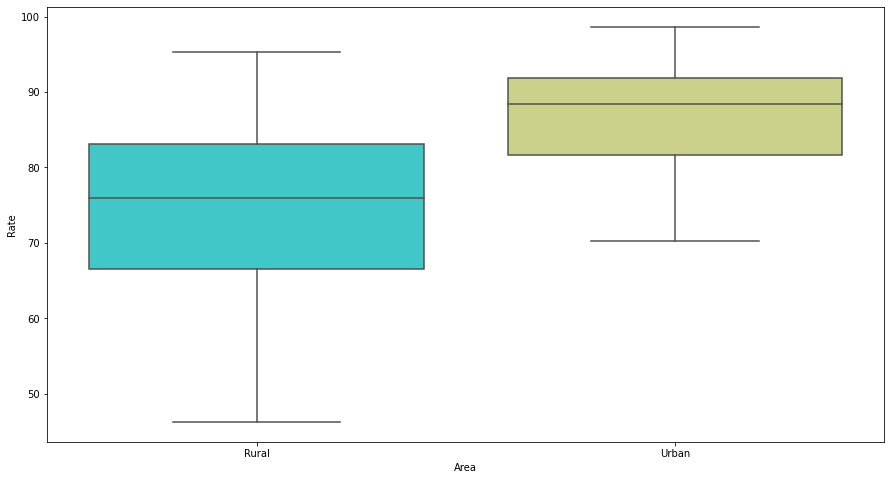

In [7]:
import seaborn as sns

#plotting area level on rate

fig, ax = plt.subplots(figsize = (15, 8))
sns.boxplot(x='Area',y='Rate',data=data2011,palette='rainbow')

<AxesSubplot:xlabel='Sex', ylabel='Rate'>

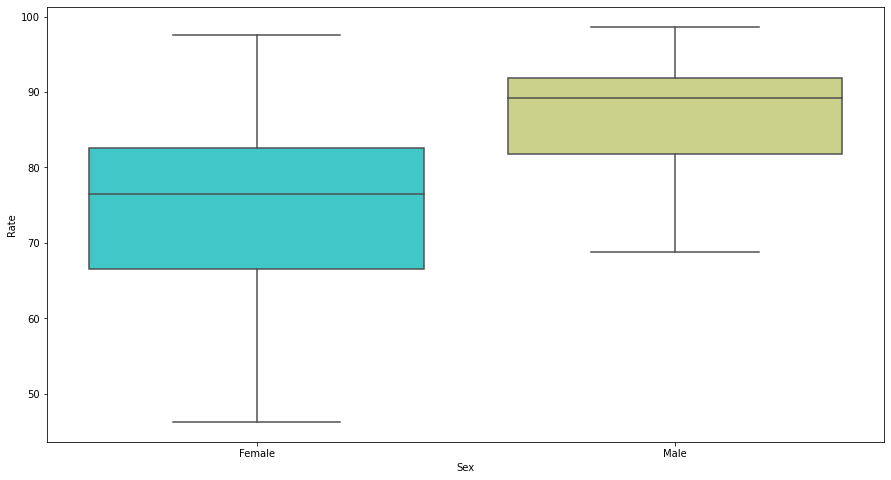

In [9]:
import seaborn as sns

#plotting sex level on rate

fig, ax = plt.subplots(figsize = (15, 8))
sns.boxplot(x='Sex',y='Rate',data=data2011,palette='rainbow')

In [52]:
#select only rural areas

rural2011 = data2011[data2011['Area'] == 'Rural']
urban2011 = data2011[data2011['Area'] == 'Urban']
females2011 = data2011[data2011['Sex'] == 'Female']
males2011 = data2011[data2011['Sex'] == 'Male']

<AxesSubplot:xlabel='Area', ylabel='Rate'>

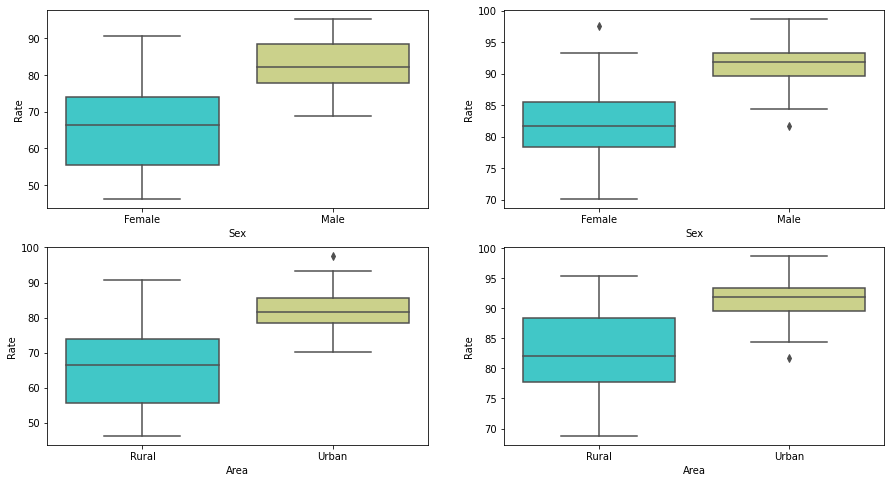

In [51]:
fig, axes = plt.subplots(2,2, figsize = (15,8))

sns.boxplot(x='Sex',y='Rate',data=rural2011,palette='rainbow', ax = axes[0,0])
sns.boxplot(x='Sex',y='Rate',data=urban2011,palette='rainbow', ax = axes[0,1])
sns.boxplot(x='Area',y='Rate',data=females2011,palette='rainbow', ax = axes[1,0])
sns.boxplot(x='Area',y='Rate',data=males2011,palette='rainbow', ax = axes[1,1])

<AxesSubplot:xlabel='Sex', ylabel='Rate'>

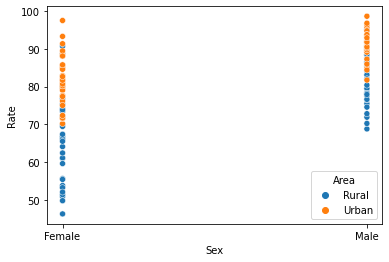

In [49]:
sns.scatterplot(data = data2011, y = 'Rate', x = 'Sex', hue = 'Area')

## 2001 data

In [34]:
#load data
data2001 = pd.read_csv('https://raw.githubusercontent.com/simonemalekar/SDS/main/literacy2001.csv', 
                   delimiter = ',', engine = 'python')

data2001.head()

,Column1,State,Area,Sex,Literacy Rate
0,1,JAMMU & KASHMIR,Rural,Male,72.71
1,2,HIMACHAL PRADESH,Rural,Male,86.55
2,3,PUNJAB,Rural,Male,71.94
3,4,CHANDIGARH #,Rural,Male,70.04
4,5,UTTARAKHAND,Rural,Male,65.56


In [37]:
data2001 = data2001.rename(columns = {'Literacy Rate': 'Rate'})

In [38]:
formula = 'Rate ~ Area + Sex'
fit = smf.ols(formula = formula, data = data2001).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rate   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     188.5
Date:                Mon, 27 Dec 2021   Prob (F-statistic):           4.58e-40
Time:                        17:49:55   Log-Likelihood:                -497.72
No. Observations:                 140   AIC:                             1001.
Df Residuals:                     137   BIC:                             1010.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        50.4888      1.253     40.294      0.000      48.011      52.967
Area[T.Urban]    18.9616      1.447     13.105      0.000      16.101      21.823
Sex[T.Male]      20.7313      1.447     14.328      0.000      17.870      23.592
==============================================================================
Omnibus:                        0.191   Durbin-Watson:                   1.408
Prob(Omnibus):                  0.909   Jarque-Bera (JB):                0.351
Skew:                          -0.050   Prob(JB):                        0.839
Kurtosis:                       2.776   Cond. No.                         3.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
formula = 'Rate ~ Area * Sex'
fit = smf.ols(formula = formula, data = data2001).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rate   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     176.7
Date:                Mon, 27 Dec 2021   Prob (F-statistic):           1.01e-46
Time:                        17:50:55   Log-Likelihood:                -479.08
No. Observations:                 140   AIC:                             966.2
Df Residuals:                     136   BIC:                             977.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    46.3940      1.271     36.500      0.000      43.880      48.908
Area[T.Urban]                27.1511      1.798     15.104      0.000      23.596      30.706
Sex[T.Male]                  28.9209      1.798     16.089      0.000      25.366      32.476
Area[T.Urban]:Sex[T.Male]   -16.3791      2.542     -6.443      0.000     -21.406     -11.352
==============================================================================
Omnibus:                        1.334   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.513   Jarque-Bera (JB):                0.905
Skew:                          -0.089   Prob(JB):                        0.636
Kurtosis:                       3.351   Cond. No.                         6.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 1991 data

In [35]:
#load data
data1991 = pd.read_csv('https://raw.githubusercontent.com/simonemalekar/SDS/main/literacy1991.csv', 
                   delimiter = ',', engine = 'python')

data1991.head()

,Column1,State,Area,Sex,Literacy Rate
0,1,HIMACHAL PRADESH,Rural,Male,55.09
1,2,PUNJAB,Rural,Male,62.42
2,3,CHANDIGARH #,Rural,Male,52.17
3,4,UTTARAKHAND,Rural,Male,51.21
4,5,HARYANA,Rural,Male,60.43


In [36]:
data1991 = data1991.rename(columns = {'Literacy Rate': 'Rate'})

In [39]:
formula = 'Rate ~ Area + Sex'
fit = smf.ols(formula = formula, data = data1991).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rate   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     290.4
Date:                Mon, 27 Dec 2021   Prob (F-statistic):           2.97e-49
Time:                        17:50:16   Log-Likelihood:                -481.13
No. Observations:                 136   AIC:                             968.3
Df Residuals:                     133   BIC:                             977.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        34.5232      1.250     27.625      0.000      32.051      36.995
Area[T.Urban]    28.1935      1.443     19.538      0.000      25.339      31.048
Sex[T.Male]      20.3618      1.443     14.110      0.000      17.507      23.216
==============================================================================
Omnibus:                        1.044   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.593   Jarque-Bera (JB):                0.705
Skew:                           0.158   Prob(JB):                        0.703
Kurtosis:                       3.156   Cond. No.                         3.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
formula = 'Rate ~ Area * Sex'
fit = smf.ols(formula = formula, data = data1991).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rate   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     214.8
Date:                Mon, 27 Dec 2021   Prob (F-statistic):           1.38e-50
Time:                        17:51:11   Log-Likelihood:                -474.91
No. Observations:                 136   AIC:                             957.8
Df Residuals:                     132   BIC:                             969.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    32.0626      1.384     23.171      0.000      29.326      34.800
Area[T.Urban]                33.1147      1.957     16.922      0.000      29.244      36.986
Sex[T.Male]                  25.2829      1.957     12.920      0.000      21.412      29.154
Area[T.Urban]:Sex[T.Male]    -9.8424      2.767     -3.556      0.001     -15.317      -4.368
==============================================================================
Omnibus:                        1.747   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.418   Jarque-Bera (JB):                1.298
Skew:                          -0.128   Prob(JB):                        0.523
Kurtosis:                       3.404   Cond. No.                         6.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""